In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

cancer=load_breast_cancer()
dir(cancer)

x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=45)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

print("Accuracy train : {:.3f}".format(tree.score(x_train,y_train)))
print("Accuracy test : {:.3f}".format(tree.score(x_test,y_test)))




Accuracy train : 1.000
Accuracy test : 0.916


In [65]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print("Accuracy train : {:.3f}".format(tree.score(x_train,y_train)))
print("Accuracy test : {:.3f}".format(tree.score(x_test,y_test)))

Accuracy train : 0.991
Accuracy test : 0.937


import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='cancertree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,
                impurity=False,filled=True)


In [53]:
print("feature Importances:{}".format(tree.feature_importances_))
type(tree.feature_importances_)

feature Importances:[0.         0.02332154 0.         0.         0.         0.
 0.         0.07269903 0.         0.         0.00999317 0.
 0.         0.         0.         0.         0.01028778 0.03498231
 0.         0.         0.         0.03660875 0.76144817 0.
 0.         0.         0.         0.05065925 0.         0.        ]


numpy.ndarray

In [56]:
print(cancer.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


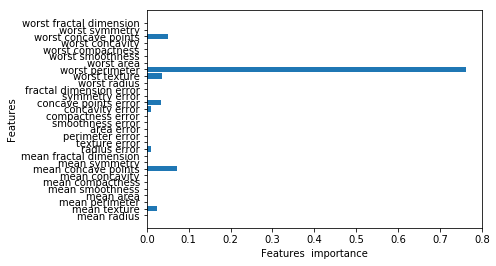

In [69]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("Features  importance")
plt.ylabel("Features")
plt.show()